In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [13]:
df=pd.read_csv("Mall_customers.csv")

In [14]:
df.head(5)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
## Here spending_Score is usually given by Mall to customer out of 100

In [16]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [18]:
## Hence there is no missing values

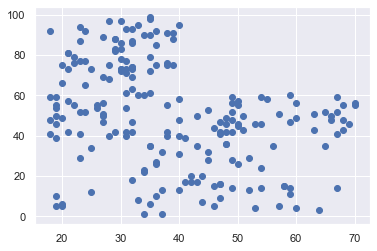

In [19]:
plt.scatter(df['Age'],df['Spending_Score'])

In [26]:
a=df.copy()
a=a.drop(columns=['Annual_Income_(k$)','CustomerID','Genre'])

In [27]:
kmeans=KMeans(2)
kmeans.fit(a)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
cluster=a.copy()
cluster['clusterprediction']=kmeans.fit_predict(a)

In [29]:
cluster

,Age,Spending_Score,clusterprediction
0,19,39,1
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,1
5,22,76,0
6,35,6,1
7,23,94,0
8,64,3,1
9,30,72,0


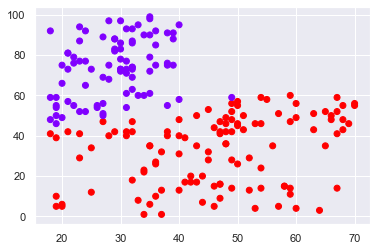

In [32]:
plt.scatter(cluster['Age'],cluster['Spending_Score'],c=cluster['clusterprediction'],cmap='rainbow')

In [34]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

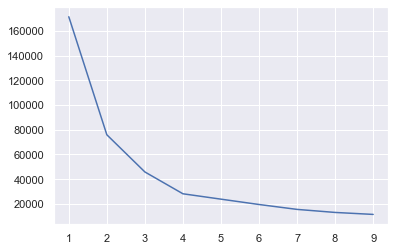

In [37]:
plt.plot(range(1,10),wcss)

### It looks like the best cluster should be 3 or 4 

In [43]:
kmeans=KMeans(3)
kmeans.fit(a)
newdata=a.copy()
newdata['clustersprediction']=kmeans.fit_predict(a)

Text(0, 0.5, 'Spending_Score')

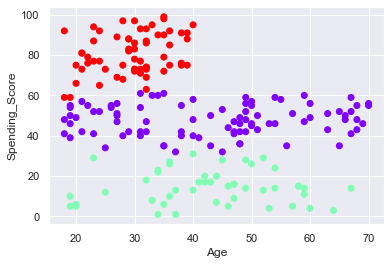

In [45]:
plt.scatter(newdata['Age'],newdata['Spending_Score'],c=newdata['clustersprediction'],cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Spending_Score")

### Its show that people aroung age 20-40 has best spending_score as compare to other